## BREAST CANCER AWARENESS

Breast cancer is the most common cancer among women in the world. It accounts for 25% of all cancer cases and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area. The critical challenge against its detection is classifying tumors into malignant (cancerous) or benign(non-cancerous). Moving forward i'm going to build a model and classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset to aid in prediction and early detection of breast cancer.

In [1]:
#this block will import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#setting the default size for all visualizations
sns.set(rc={'figure.figsize':(12,8)})

In [2]:
#importing/reading data
filename = r'C:\Users\Chris\Desktop\BreastCancerML_Folder\breast-cancer-diagnosis-ml\data\external\breast-cancer.csv'
df = pd.read_csv(filename).drop(['id'],axis=1)

target = 'diagnosis'
labels = ['Malignant','Benign']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Inference: The Datset consists of 31 features & 569 samples.


### Data Exploration

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

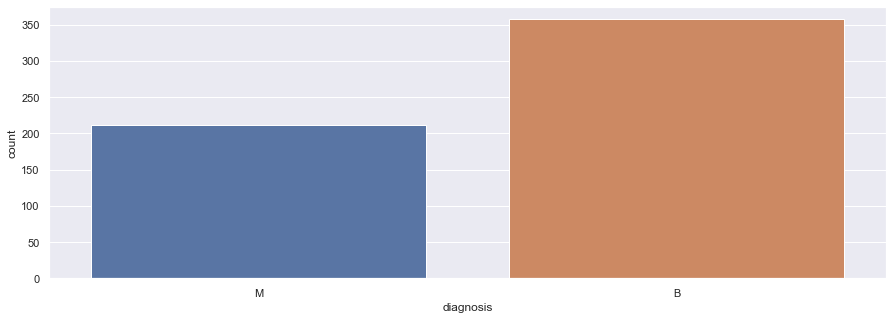

In [3]:
plt.figure(figsize=(15,5))
sns.countplot(data= original_df,x='diagnosis')

In [4]:
nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=15:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 30 numerical & 0 categorical features.


In [5]:
#checking for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
#verifying all statistical metrics
display(df.describe())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Data Preprocessing

In [7]:
#checking for empty elements
print(df.isnull().sum())
print('\n\033[1mInference:\033[0m The dataset doesn\'t have any null elements')

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Inference: The dataset doesn't have any null elements


                                     Features Distribution                                      


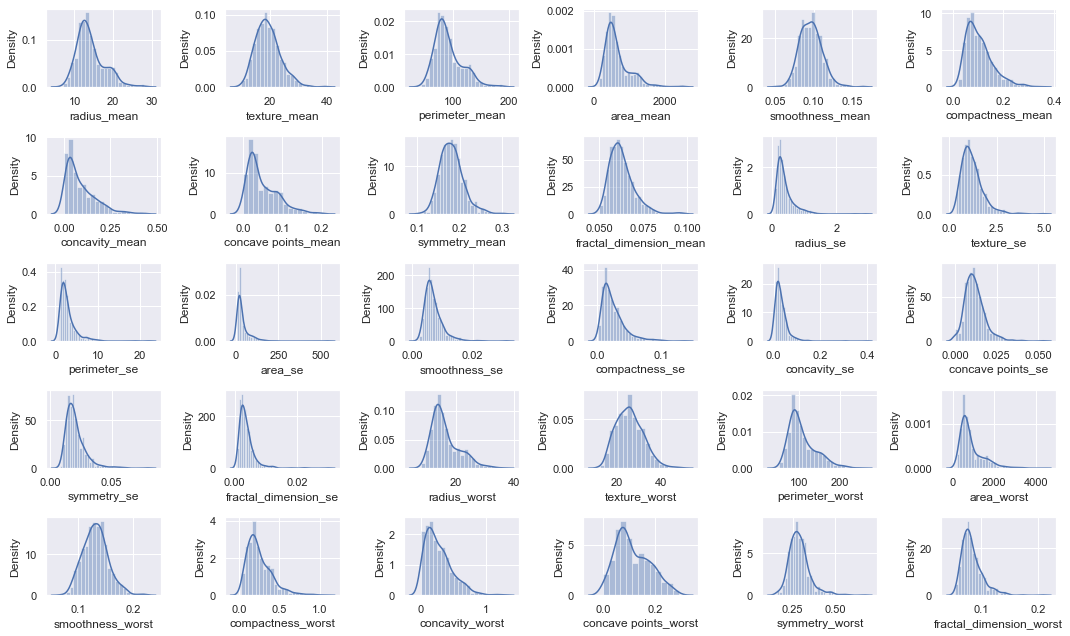

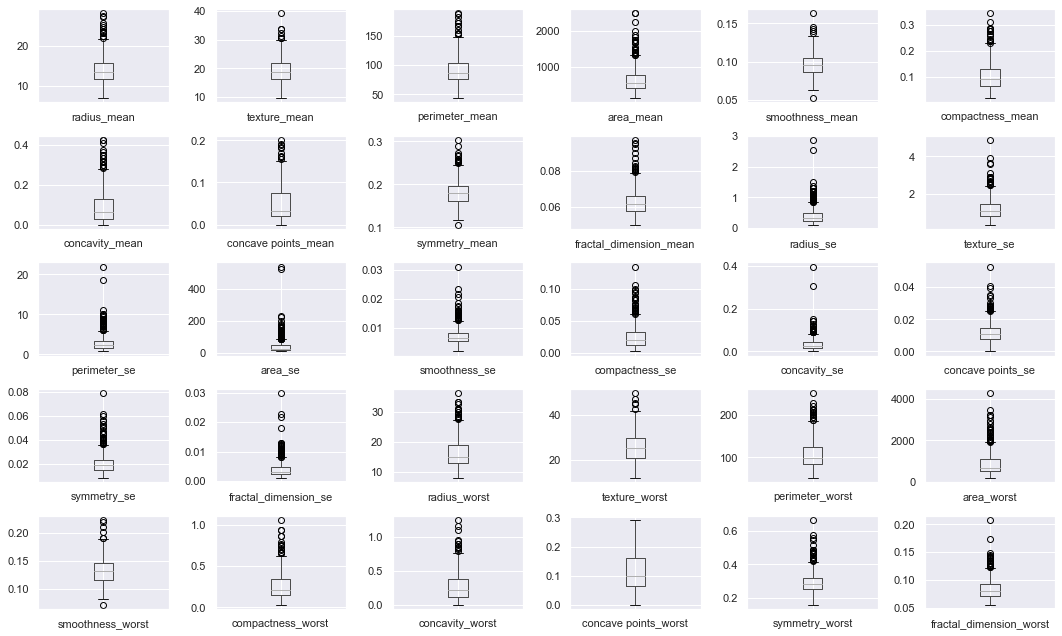

In [8]:
import math
print('\033[1mFeatures Distribution'.center(100))

nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(features)/10)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/6),6,c+1)
    sns.distplot(df[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/10)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/6),6,c+1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()

inference: The figures above shows that most features have a normal distribution. However, there are so many outliers.

In [9]:
#verifying if there are any duplicates in the data
counter = 0
r,c = df.shape

df1 = df.drop_duplicates()
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df1.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [10]:
#removing outliers
df2 = df1.copy()

for i in features:
    if df2[i].nunique()>=12:
        Q1 = df2[i].quantile(0.15)
        Q3 = df2[i].quantile(0.85)
        IQR = Q3 - Q1
        df2 = df2[df2[i] <= (Q3+(1.5*IQR))]
        df2 = df2[df2[i] >= (Q1-(1.5*IQR))]
df2 = df2.reset_index(drop=True)
display(df2.head())
print('\n\033[1mInference:\033[0m After removal of outliers, The dataset now has {} features & {} samples.'.format(df2.shape[1], df2.shape[0]))

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
3,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
4,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368



Inference: After removal of outliers, The dataset now has 31 features & 502 samples.


In [11]:
#converting catergorical columns to numeric
df3 = df2.copy()

#Target Variable
MAP={}
for i,e in enumerate(df3[target].unique()):
    MAP[e]=i
df3[target]=df3[target].map(MAP)
print('Mapping Target variable --->',MAP)

#One-Hot Binay Encoding
oh=True
dm=True
for i in cf:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("One-Hot Encoding on features:")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df2[i].nunique()<15):
        if dm==True: print("\nDummy Encoding on features:")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        

Mapping Target variable ---> {'M': 0, 'B': 1}


In [12]:
df3.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
3,0,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
4,0,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [13]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [14]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [15]:
import imblearn

In [16]:
#Fixing the imbalances using SMOTE Technique

from imblearn.over_sampling import SMOTE

df4 = df3.copy()

print('Original class distribution:')
print(df4[target].value_counts())

xf = df4.columns
X = df4.drop([target],axis=1)
Y = df4[target]

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df5 = pd.DataFrame(X, columns=xf)
df5[target] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
1    337
0    165
Name: diagnosis, dtype: int64

Class distribution after applying SMOTE Technique:
0    337
1    337
Name: diagnosis, dtype: int64


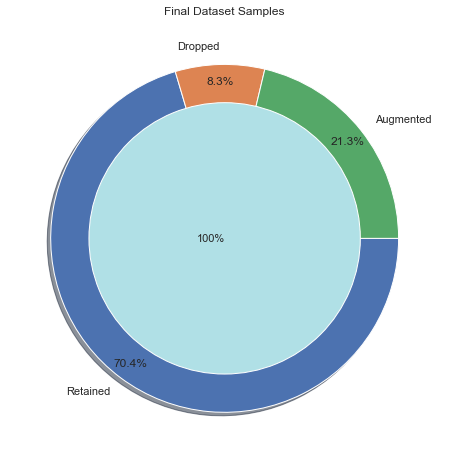


Inference:The final dataset after cleanup has 569 samples & 31 rows.


In [17]:
#Final Dataset size after performing Preprocessing

plt.title('Final Dataset Samples')
plt.pie([df.shape[0], original_df.shape[0]-df4.shape[0], df5.shape[0]-df4.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped','Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} rows.'.format(df.shape[0], df.shape[1]))

## Data Manipulation

In [18]:
#Splitting the data into 75% training and 25% testing
from sklearn.model_selection import train_test_split
df = df5.copy()

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.75, test_size=0.25, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (674, 30) (674,) 
Training set  --->  (505, 30) (505,) 
Testing set   --->  (169, 30)  (169,)


In [19]:
#feature scaling
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

print('\033[1mStandardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                Standardization on Training set                                 


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02,...,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02
mean,-3.596683e-16,-9.134607e-16,7.628661e-17,1.837914e-16,8.881784e-17,-1.261917e-16,-2.660138e-17,-3.693415e-17,-4.001200e-17,-1.334466e-16,...,-5.711603e-16,-2.085790e-16,-1.103628e-16,-9.893076e-17,2.897572e-16,-1.002498e-16,-1.118467e-16,2.079745e-16,-7.171381e-16,-5.320277e-16
std,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00,...,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00
min,-2.305286e+00,-2.339276e+00,-2.266470e+00,-1.727916e+00,-3.544467e+00,-1.963959e+00,-1.374892e+00,-1.501906e+00,-2.718187e+00,-2.159986e+00,...,-1.993080e+00,-2.424559e+00,-1.979396e+00,-1.493932e+00,-2.512984e+00,-1.667694e+00,-1.586561e+00,-2.011481e+00,-2.488882e+00,-1.743110e+00
25%,-7.590038e-01,-7.134645e-01,-7.800939e-01,-7.779566e-01,-6.973822e-01,-7.730000e-01,-8.288652e-01,-8.281802e-01,-7.672689e-01,-7.802405e-01,...,-8.145873e-01,-7.388170e-01,-8.167341e-01,-7.943803e-01,-6.787183e-01,-7.375107e-01,-8.179987e-01,-8.080164e-01,-6.853487e-01,-7.272094e-01
50%,-2.215821e-01,-1.712941e-05,-2.241742e-01,-3.168740e-01,1.100870e-02,-8.603967e-02,-1.653517e-01,-2.204686e-01,1.534847e-02,-7.187230e-02,...,-2.111814e-01,1.504411e-02,-2.027621e-01,-3.338177e-01,2.141975e-02,-2.199312e-01,-1.083027e-01,1.453747e-02,-8.074338e-02,-1.949443e-01
75%,7.756338e-01,6.259069e-01,7.763075e-01,7.226729e-01,6.577496e-01,6.063958e-01,6.788755e-01,7.902348e-01,6.346698e-01,6.791061e-01,...,7.385837e-01,6.635463e-01,7.175591e-01,6.672287e-01,5.942095e-01,6.410204e-01,6.267003e-01,7.891181e-01,5.917258e-01,5.411671e-01
max,3.140289e+00,3.718396e+00,3.301882e+00,3.628733e+00,3.290559e+00,3.666609e+00,3.891064e+00,3.727474e+00,3.293362e+00,3.098214e+00,...,2.814561e+00,4.236666e+00,3.156888e+00,3.105501e+00,2.745245e+00,3.421178e+00,3.383512e+00,2.631681e+00,3.705237e+00,3.355044e+00



                                  Standardization on Testing set                                 


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,...,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,0.043421,0.015605,0.039110,0.039773,-0.022891,-0.050948,-0.024158,0.008990,-0.164559,-0.023445,...,0.014535,-0.039031,0.002955,0.005685,0.040659,-0.049315,-0.051445,-0.030708,-0.089230,-0.027283
std,0.997194,1.159350,0.996738,0.993247,0.995983,1.048253,0.984057,1.012816,1.119997,1.063014,...,0.972944,1.119062,0.977469,0.972222,1.011045,1.048091,0.976300,1.006417,1.025118,1.044323
min,-2.081957,-2.607150,-2.083780,-1.618900,-2.600980,-1.801732,-1.374892,-1.501906,-2.935964,-2.095108,...,-1.743222,-2.578965,-1.764124,-1.372406,-2.301025,-1.603098,-1.586561,-2.011481,-2.342872,-1.887001
25%,-0.666448,-0.774466,-0.668038,-0.688396,-0.752844,-0.883962,-0.928415,-0.919730,-0.844398,-0.831196,...,-0.727453,-0.798763,-0.778202,-0.719490,-0.520468,-0.918668,-0.896120,-0.891907,-0.858093,-0.774507
50%,-0.123055,-0.124671,-0.087265,-0.192416,0.053895,-0.076926,-0.092409,0.007575,-0.159308,-0.140305,...,-0.187219,-0.090315,-0.212316,-0.297244,0.050193,-0.241089,-0.009826,-0.034048,-0.092959,-0.232916
75%,0.856028,0.653489,0.865524,0.817210,0.636494,0.598932,0.747433,0.825838,0.507633,0.460791,...,0.724057,0.732575,0.717559,0.649082,0.611262,0.550081,0.611296,0.718394,0.470393,0.569146
max,2.558083,3.784702,2.456012,3.035780,2.643226,4.047115,2.468486,2.787093,4.214377,3.351599,...,2.633757,3.486438,2.475281,3.208064,2.169789,3.558310,2.278807,2.689983,3.588018,3.368367


## FEATURE SELECTION/EXTRACTION

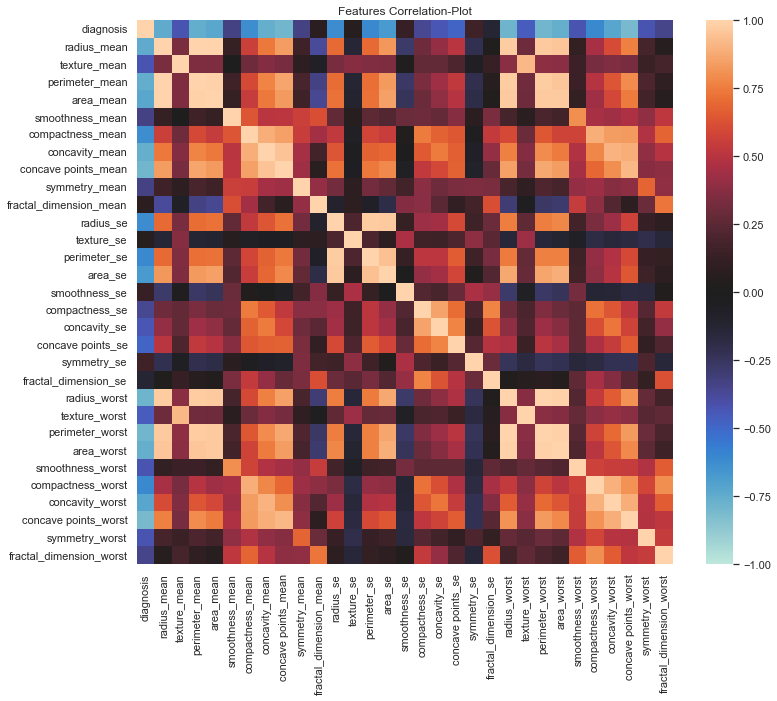

In [20]:
#checking for the relationship between the features
features = df.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(df[features].corr(), vmin=-1, vmax=1, center=0) #, annot=True
plt.show()

**Inference:**

Correlation plt between the variables convey lot of information about the realationship betweem them. The features do not have strong multi-collinearity between them . Hence we shall perform Feature Selection/Extraction steps to take care of these multi-collinearity...

**Strategy:**

We can fix these multicollinearity with two techniques:

- Manual Method - Variance Inflation Factor (VIF)
- Automatic Method - Recursive Feature Elimination (RFE)

In [21]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import loguniform
from IPython.display import display

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

In [22]:
from scipy.stats import randint
import scipy

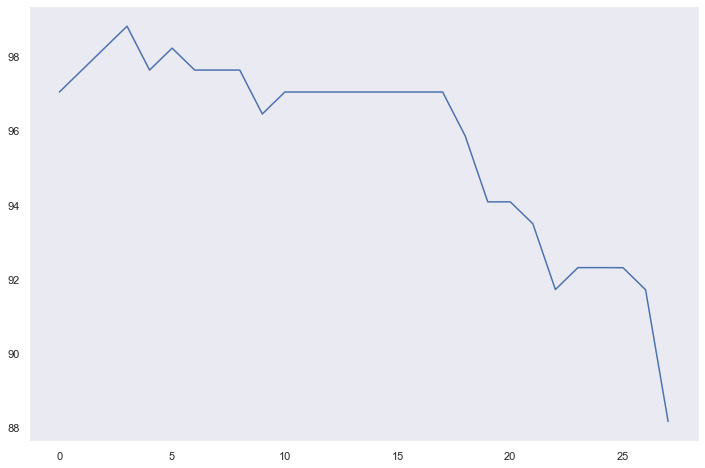

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
DROP=[]; scores=[]
#scores.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std)))

for i in range(len(X.columns.values)-2):
    vif = pd.DataFrame()
    Xs = X.drop(DROP,axis=1)
    #print(DROP)
    vif['Features'] = Xs.columns
    vif['VIF'] = [variance_inflation_factor(Xs.values, i) for i in range(Xs.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    DROP.append(vif.Features[0])
    if vif.VIF[0]>=2.5:
        scores.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
    #print(scores)
    
plt.plot(scores)
#plt.ylim([0.7,0.85])
plt.grid()
plt.show()

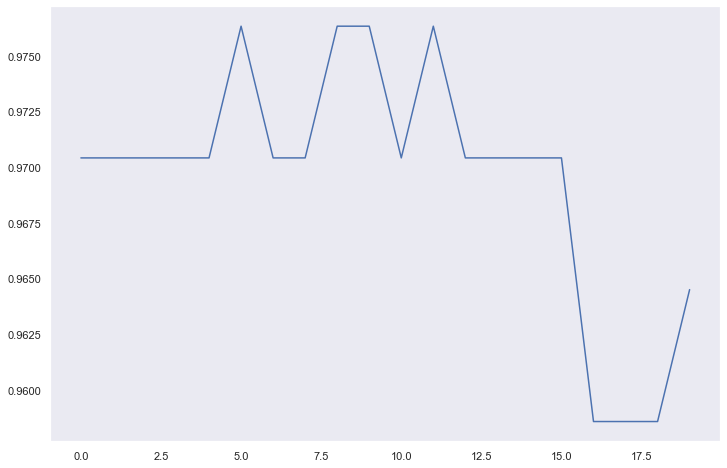

In [24]:
# Applying Recurrsive Feature Elimination

# Running RFE with the output number of the variable equal to 10
LR = LogisticRegression()#.fit(Train_X_std, Train_Y)
scores=[]

for i in range(20):
    rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns)-i)   
    rfe = rfe.fit(Train_X_std, Train_Y)
    scores.append(f1_score(Test_Y,LR.fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]), average='weighted'))
    #print(scores)
    
plt.plot(scores)
#plt.ylim([0.80,0.84])
plt.grid()
plt.show()

**Inference:** In both VIF & RFE Techniques, we can notice better scores upon dropping some multicollinear features. While the scores of VIF technique decline wrt to each feature drop, the RFE technique can increase the F2-score for dropping 2 features. Hence we shall use the features shortlisted by RFE Technique.

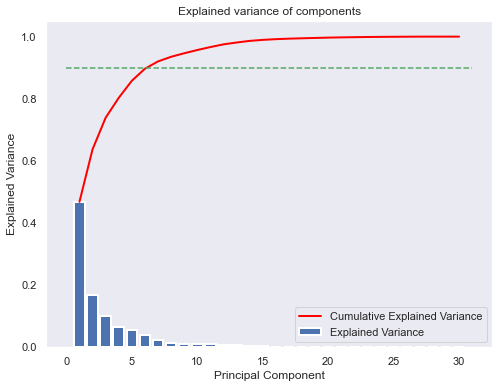

In [25]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.90,0.90],'g--')
#plt.plot([10,10],[0,1],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.grid()
plt.legend()
plt.show()

In [26]:
pca = PCA(n_components=7)

Train_X_std_pca = pca.fit_transform(Train_X_std)
print('The shape of final transformed training feature set:')
print(Train_X_std_pca.shape)
Train_X_std_pca = pd.DataFrame(Train_X_std_pca)

Test_X_std_pca = pca.transform(Test_X_std)
print('\nThe shape of final transformed testing feature set:')
print(Test_X_std_pca.shape)
Test_X_std_pca = pd.DataFrame(Test_X_std_pca)

Train_X_std = Train_X_std_pca
Test_X_std = Test_X_std_pca

The shape of final transformed training feature set:
(505, 7)

The shape of final transformed testing feature set:
(169, 7)


In [27]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((4,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)',
                         'Support Vector Machine (SVM)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Support Vector Machine (SVM),0.0,0.0,0.0,0.0,0.0


In [28]:
#Let us define functions to summarise the Prediction's scores .

#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred_prob[:, 1]),3)*100 #, multi_class='ovr'
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred),3)*100)) #, average='weighted'
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))
    
    #auc_roc_score(Test_Y, pred_prob, curves=['each_class'])
    #plt.show()

#Visualising Function
def AUC_ROC_plot(Test_Y, pred):    
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

From here on I am going to test all four of the models to see which performs best.

### 1.Logistic Regression Classifier

In [29]:
# Building Logistic Regression Classifier

LR_model = LogisticRegression()

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(LR_model, space, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

LR = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = LR.predict(Test_X_std)
pred_prob = LR.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,0)

#print('\n\033[1mInterpreting the Output of Logistic Regression:\n\033[0m')

#print('intercept ', LR.intercept_[0])
#print('classes', LR.classes_)
#display(pd.DataFrame({'coeff': LR.coef_[0]}, index=Train_X_std.columns))

<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 95.3%
F1 Score = 95.19999999999999%

 Confusiton Matrix:
 [[81  1]
 [ 7 80]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        82
           1       0.99      0.92      0.95        87

    accuracy                           0.95       169
   macro avg       0.95      0.95      0.95       169
weighted avg       0.96      0.95      0.95       169



### 2. Desicion Tree Classifier

In [30]:
DT_model = DecisionTreeClassifier()

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(DT_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

DT = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = DT.predict(Test_X_std)
pred_prob = DT.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,1)

#print('\n\033[1mInterpreting the output of Decision Tree:\n\033[0m')
#tree.plot_tree(DT)
#plt.show()

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) ----------------------------------->>>

Accuracy = 92.9%
F1 Score = 92.9%

 Confusiton Matrix:
 [[78  4]
 [ 8 79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        82
           1       0.95      0.91      0.93        87

    accuracy                           0.93       169
   macro avg       0.93      0.93      0.93       169
weighted avg       0.93      0.93      0.93       169



### 3.Random Forest Classifier

In [31]:
RF_model = RandomForestClassifier()

param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [200, 500,]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(RF_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

RF = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = RF.predict(Test_X_std)
pred_prob = RF.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,2)

<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 94.69999999999999%
F1 Score = 94.8%

 Confusiton Matrix:
 [[78  4]
 [ 5 82]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95        82
           1       0.95      0.94      0.95        87

    accuracy                           0.95       169
   macro avg       0.95      0.95      0.95       169
weighted avg       0.95      0.95      0.95       169



### 4. Support Vector Machine(SVM)

In [32]:
# Building Support Vector Machine Classifier

SVM_model = SVC(probability=True).fit(Train_X_std, Train_Y)

svm_param = {"C": [.01, .1, 1, 5, 10, 100],             
             "gamma": [.01, .1, 1, 5, 10, 100],
             "kernel": ["rbf"],
             "random_state": [0]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(SVM_model, svm_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

SVM = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = SVM.predict(Test_X_std)
pred_prob = SVM.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,3)

<<<----------------------------------- Evaluating Support Vector Machine (SVM) ----------------------------------->>>

Accuracy = 96.39999999999999%
F1 Score = 96.5%

 Confusiton Matrix:
 [[80  2]
 [ 4 83]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        82
           1       0.98      0.95      0.97        87

    accuracy                           0.96       169
   macro avg       0.96      0.96      0.96       169
weighted avg       0.96      0.96      0.96       169



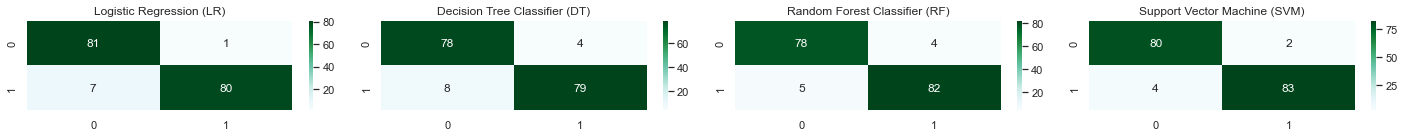

In [33]:
#Plotting Confusion-Matrix of all the predictive Models

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels # type: ignore
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[20,3.5*math.ceil(len(all_models)*len(labels)/14)])
    
    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(2,4,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/3),3,i+1)
        pred = all_models[i].predict(Test_X_std)
        #plot_cm(Test_Y, pred)
        sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, cmap='BuGn', fmt='.0f') #vmin=0,vmax=5
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([LR,DT,RF,SVM])

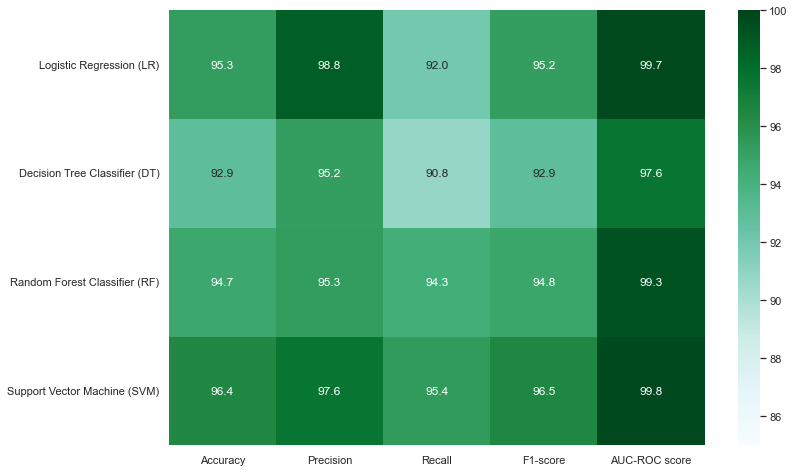

In [34]:
#Comparing all the models Scores

#plt.figure(figsize=[12,5])
sns.heatmap(Evaluation_Results, annot=True, vmin=85, vmax=100, cmap='BuGn', fmt='.1f')
plt.show()

**Insights:** For the current problem statement, it is more important to focus on the Recall-score. Except Decision Trees, most of the algorithms perform well. The best performing algorithm in this case is Support Vector Machines Classifier...

### Outcomes and Conclusion

**Here are some of the key outcomes of the project:**

- The Dataset was small totally around 569 samples & after preprocessing 8.3% of the datasamples were dropped.
- The samples were highly imbalanced, hence SMOTE Technique was applied on the data to balance the classes, adding 21.3% more samples to the dataset.
- Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the featureset.
- Feature Selection/Eliminination was carried out and appropriate features were shortlisted.
- Testing multiple algorithms with fine-tuning hyperparamters gave us some understanding on the model performance for various algorithms on this specific dataset.
- The Support Vector algorithm perform the best on the current dataset, considering Recall as the key-metric, as is relatively ok to falsely classify any patient as False Positive, but can be quiet dangerous if classified as False Negative.
- Yet it wise to also consider simpler model like Logistic Regression as it is more generalisable & is computationally less expensive.